## IMDB Movie EDA Preprocessing
<ol>
<li>Dataset Control</li>
<li>Correction of Data Columns</li>
<li>Cleaning and Correction of the Dataset</li>
<li>Basic Feature Engineering</li>
<li>Data Visualization</li>
<ol>

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

folder_path = "Scraped_datasets/"

file_names = ["imdb_scraped_data_action.csv",
              "imdb_scraped_data_comedy.csv",
              "imdb_scraped_data_crime.csv",
              "imdb_scraped_data_drama.csv",
              "imdb_scraped_data_horror.csv",
              "imdb_scraped_data_thriller.csv",
              "imdb_scraped_data_scifi.csv"]

file_paths = [folder_path + file_name for file_name in file_names]

df_combined = pd.concat([pd.read_csv(file_path) for file_path in file_paths], ignore_index=True)

In [3]:
df_combined

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
12975,57.0,World War Z,(2013),116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,58.0,2001: A Space Odyssey,(1968),149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,59.0,The Hunger Games: Catching Fire,(2013),146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,60.0,Spider-Man: Homecoming,(2017),133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [4]:
df_combined = df_combined.drop(columns=["Number"])
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
12975,World War Z,(2013),116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,2001: A Space Odyssey,(1968),149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,The Hunger Games: Catching Fire,(2013),146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,Spider-Man: Homecoming,(2017),133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [5]:
df_combined["Year"] = df_combined["Year"].str.replace(r'\D', '', regex=True).astype(str)
df_combined["Year"] = df_combined["Year"].str.replace(r'', '')
df_combined["Year"] = df_combined["Year"].str.replace(r'I', '', regex=True)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
12975,World War Z,2013,116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,2001: A Space Odyssey,1968,149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,The Hunger Games: Catching Fire,2013,146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,Spider-Man: Homecoming,2017,133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [6]:
len(df_combined.loc[df_combined.duplicated(subset =  ["Title", "Rating", "Runtime"]),:])

4883

In [7]:
df_combined.drop_duplicates(subset = ["Title", "Rating", "Runtime"], keep = "first", inplace=True)

In [8]:
df_combined.reset_index(inplace = True)
df_combined

,index,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
8092,12914,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,12915,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,12918,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,12930,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [9]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("index")]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [10]:
df_combined.head(15)

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
5,The Dark Knight Rises,2012,164 min,Action - Drama - Thriller,8.4,"$250,000,000","448,139,099",1737213,78.0
6,The Lord of the Rings: The Two Towers,2002,179 min,Action - Adventure - Drama,8.8,"$94,000,000","342,551,365",1699229,87.0
7,Gladiator,2000,155 min,Action - Adventure - Drama,8.5,"$103,000,000","187,705,427",1531948,67.0
8,Batman Begins,2005,140 min,Action - Crime - Drama,8.2,"$150,000,000","206,852,432",1499318,70.0
9,The Avengers,2012,143 min,Action - Sci-Fi,8.0,"$220,000,000","623,279,547",1412844,69.0


In [11]:
df_combined.tail(15)

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
8082,Red Road,2006,113 min,Drama - Mystery - Thriller,6.8,NaN,"153,432",13361,73.0
8083,Manhattan Night,2016,113 min,Crime - Drama - Mystery,6.2,NaN,NaN,13350,44.0
8084,Te3n,2016,136 min,Drama - Mystery - Thriller,7.2,NaN,"258,066",13350,NaN
8085,Table No. 21,2013,108 min,Adventure - Drama - Thriller,7.2,NaN,"31,658",13347,NaN
8086,Ittefaq,2017,105 min,Crime - Mystery - Thriller,7.2,"₹290,000,000","298,032",13346,NaN
8087,Law of Desire,1987,102 min,Comedy - Drama - Thriller,7.1,NaN,NaN,13299,NaN
8088,Arkansas,2020,117 min,Crime - Thriller,6.0,NaN,NaN,13281,55.0
8089,Beyond a Reasonable Doubt,2009,106 min,Crime - Drama - Mystery,5.8,"$25,000,000","32,409",13271,35.0
8090,Roja,1992,137 min,Drama - Romance - Thriller,8.1,NaN,NaN,13250,NaN
8091,My Son,2021,95 min,Crime - Drama - Mystery,6.0,NaN,NaN,13228,NaN


In [12]:
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [13]:
df_combined = df_combined[df_combined["Year"] != "nan"]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [14]:
df_combined = df_combined[df_combined["Year"] != "2024"]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [15]:
df_combined = df_combined.dropna(subset=["Runtime"])
df_combined.reset_index(inplace = True)
df_combined

,index,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
8091,8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8092,8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8093,8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8094,8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [16]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("index")]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8091,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8092,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8093,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8094,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [17]:
A = ["Budget", "Metascore", "Gross US & Canada"]
en_az_bir_bos_hucre_sayisi = df_combined[A].isnull().any(axis=1).sum()
print(en_az_bir_bos_hucre_sayisi)

3056


In [18]:
bos_satirlar = df_combined[df_combined[A].isna().any(axis=1)]
print(len(bos_satirlar))

3056


In [19]:
Nan_delete = ["Budget", "Metascore", "Gross US & Canada"]
df_combined = df_combined.dropna(subset = Nan_delete)

In [20]:
df_combined.isnull().sum()

Title                0
Year                 0
Runtime              0
Genre                0
Rating               0
Budget               0
Gross US & Canada    0
Votes                0
Metascore            0
dtype: int64

In [21]:
df_combined.shape

(5040, 9)

In [22]:
df_combined = df_combined .drop(df_combined[~df_combined["Budget"].str.startswith("$")].index)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8058,The Crossing Guard,1995,111 min,Drama - Thriller,6.3,"$9,000,000","832,910",14017,46.0
8068,Owning Mahowny,2003,104 min,Crime - Drama - Thriller,7.0,"$10,000,000","1,011,054",13778,70.0
8088,Beyond a Reasonable Doubt,2009,106 min,Crime - Drama - Mystery,5.8,"$25,000,000","32,409",13271,35.0
8094,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [23]:
df_combined.shape

(4852, 9)

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4852 entries, 0 to 8095
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4852 non-null   object 
 1   Year               4852 non-null   object 
 2   Runtime            4852 non-null   object 
 3   Genre              4852 non-null   object 
 4   Rating             4852 non-null   float64
 5   Budget             4852 non-null   object 
 6   Gross US & Canada  4852 non-null   object 
 7   Votes              4852 non-null   int64  
 8   Metascore          4852 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 379.1+ KB


In [25]:
df_combined["Year"] = df_combined["Year"].astype("int64")

In [26]:
df_combined['Runtime'] = df_combined["Runtime"].str.replace(" min", "").astype("int64")

In [27]:
df_combined["Budget"] = df_combined["Budget"].str.replace("$", "").str.replace(",", "").astype("float64")

C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\2402471335.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_combined["Budget"] = df_combined["Budget"].str.replace("$", "").str.replace(",", "").astype("float64")


In [28]:
df_combined["Gross US & Canada"] = df_combined["Gross US & Canada"].str.replace(",", "").astype('float64')

In [29]:
df_combined.reset_index(drop=True, inplace=True)

In [30]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4852 non-null   object 
 1   Year               4852 non-null   int64  
 2   Runtime            4852 non-null   int64  
 3   Genre              4852 non-null   object 
 4   Rating             4852 non-null   float64
 5   Budget             4852 non-null   float64
 6   Gross US & Canada  4852 non-null   float64
 7   Votes              4852 non-null   int64  
 8   Metascore          4852 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 341.3+ KB


In [31]:
df_combined.nunique()

Title                4747
Year                   90
Runtime               131
Genre                 306
Rating                 71
Budget                422
Gross US & Canada    4802
Votes                4806
Metascore              92
dtype: int64

In [32]:
print(df_combined["Genre"].value_counts().head(10))

Comedy -  Drama -  Romance          242
Action -  Crime -  Drama            167
Comedy -  Drama                     164
Animation -  Adventure -  Comedy    156
Action -  Adventure -  Sci-Fi       129
Action -  Adventure -  Comedy       125
Comedy                              121
Drama -  Romance                    108
Drama                               108
Crime -  Drama -  Thriller          106
Name: Genre, dtype: int64


---

In [33]:
df_combined["Clear_Genre"] = df_combined["Genre"].str.replace("-", "").str.split(" - ")

categories = set()
for genres in df_combined["Clear_Genre"]:
    categories.update(genres)
df_combined["Clear_Genre"] = df_combined["Clear_Genre"].apply(lambda x: "-".join(sorted(x)))

genres_dummies = df_combined["Clear_Genre"].str.get_dummies(sep=" ")

In [34]:
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama
...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family


In [35]:
genres_dummies

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4848,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4849,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4850,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genres_dummies["Action"].sum()

1529

In [37]:
genres_dummies["Comedy"].sum()

1802

In [38]:
genres_dummies["SciFi"].sum()

442

In [39]:
genres_dummies["Adventure"].sum()

1070

In [40]:
df_combined["Estimated Worldwide Gross"] = df_combined["Gross US & Canada"] / 0.4
df_combined["Score"] = ( df_combined["Rating"] + df_combined["Metascore"] / 10 ) / 2
df_combined["Estimated Revenue"] = df_combined["Estimated Worldwide Gross"] - df_combined["Budget"] 
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Estimated Worldwide Gross,Score,Estimated Revenue
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama,1.337146e+09,8.70,1.152146e+09
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi,7.314405e+08,8.10,5.714405e+08
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,4.286998e+08,8.00,3.656998e+08
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,7.888619e+08,9.00,6.958619e+08
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.446148e+08,9.20,8.506148e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller,2.082275e+06,5.45,-6.917725e+06
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller,2.527635e+06,7.00,-7.472365e+06
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery,8.102250e+04,4.65,-2.491898e+07
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,5.595204e+08,8.95,3.795204e+08


---
#### Data Visualization

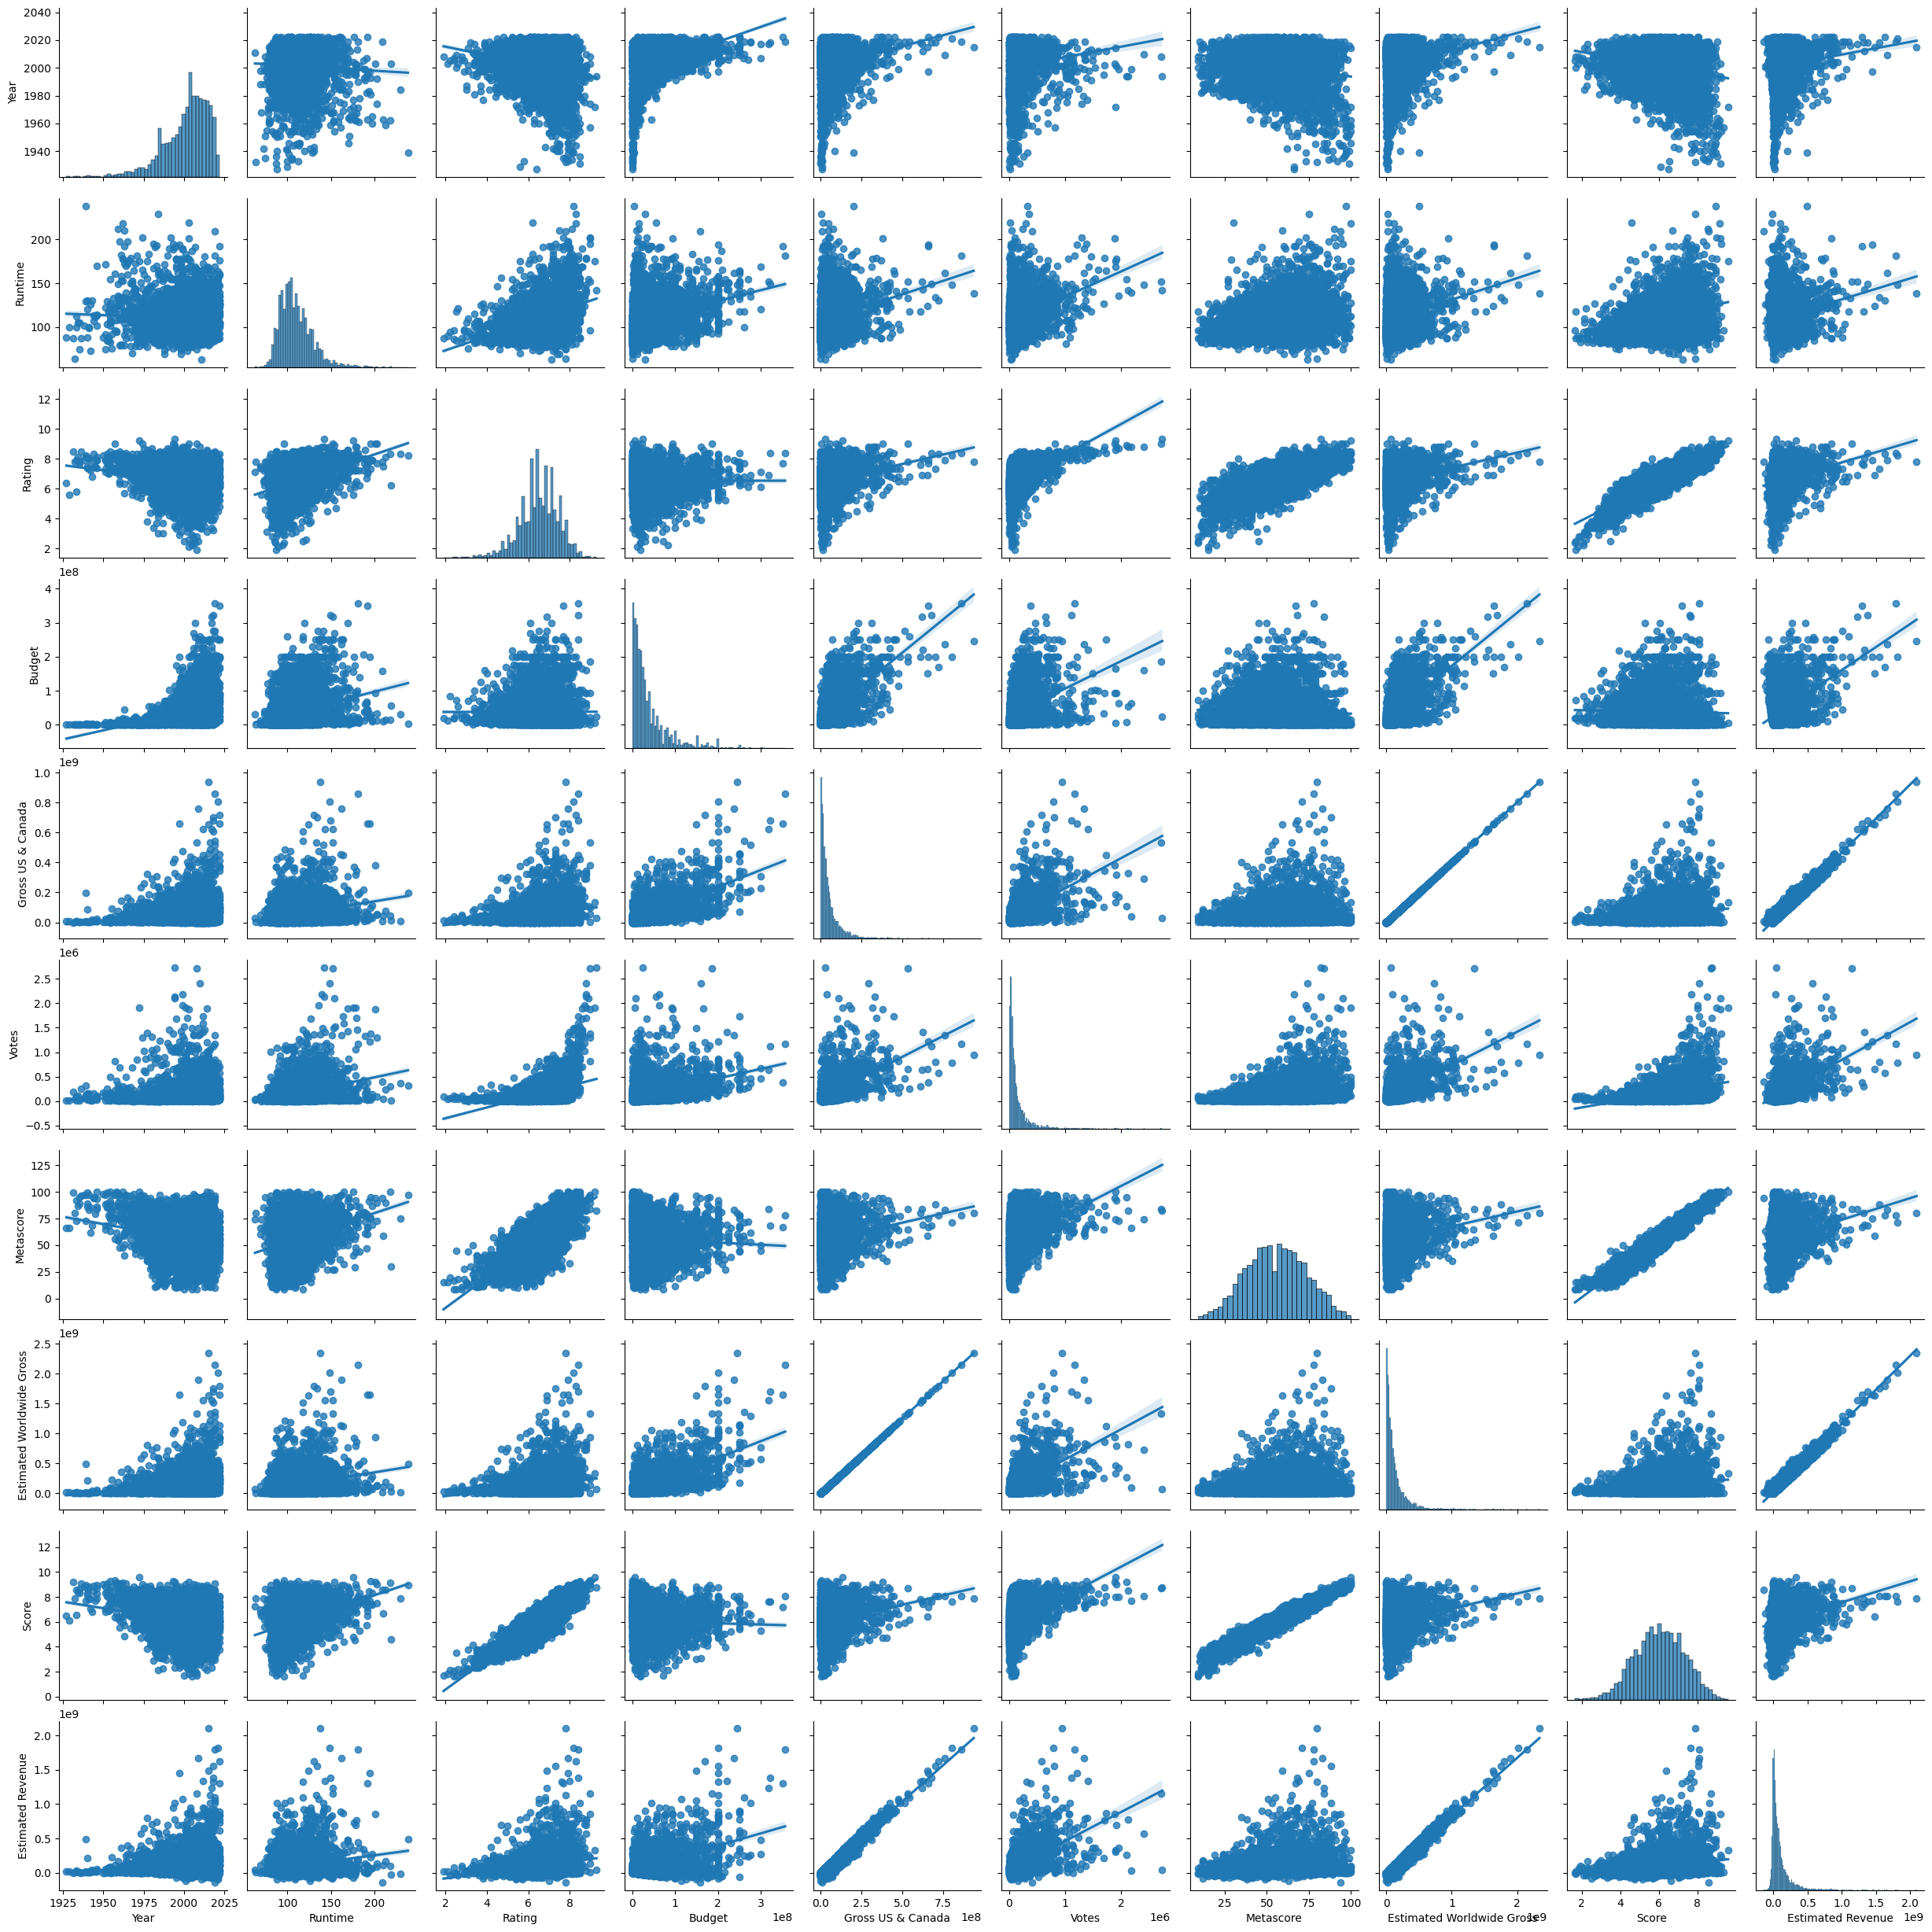

In [41]:
sns.pairplot(df_combined, kind = "reg")

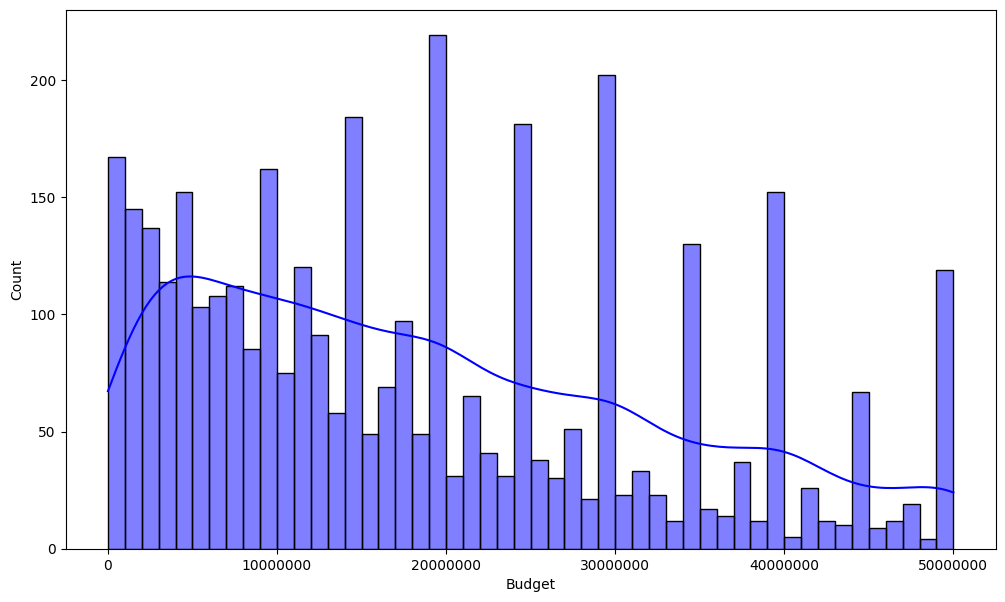

In [42]:
budget_threshold = 50000000
df_filtered = df_combined[df_combined["Budget"] <= budget_threshold]

plt.figure(figsize=(12, 7))
sns.histplot(df_filtered["Budget"], bins=50, kde=True, color="blue")
plt.xlabel("Budget")
plt.ylabel("Count")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

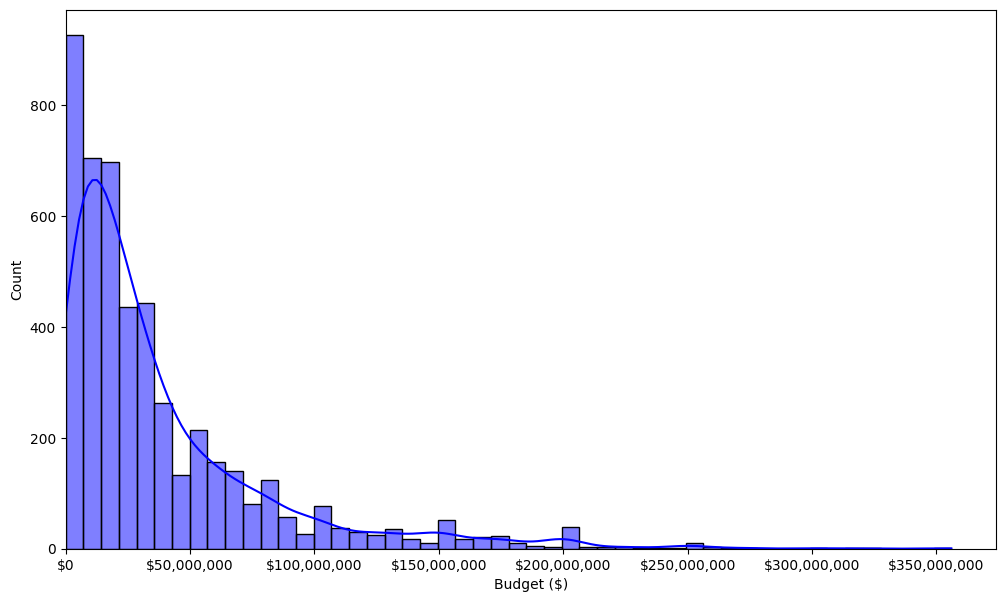

In [43]:
plt.figure(figsize=(12, 7))
sns.histplot(df_combined["Budget"], bins=50, kde=True, color="blue")
plt.xlabel("Budget ($)")
plt.ylabel("Count")
plt.ticklabel_format(style='plain', axis='x')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)

xmin=0
plt.xlim(0)

plt.show()

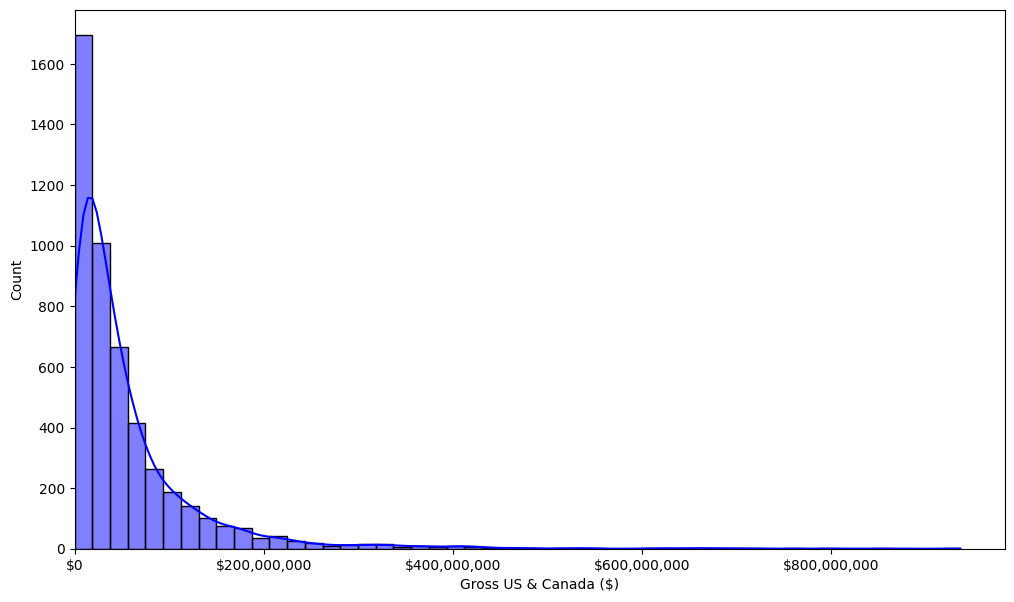

In [44]:
plt.figure(figsize=(12, 7))
sns.histplot(df_combined["Gross US & Canada"], bins=50, kde=True, color="blue")
plt.xlabel("Gross US & Canada ($)")
plt.ylabel("Count")
plt.ticklabel_format(style='plain', axis='x')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)

xmin=0
plt.xlim(0)

plt.show()

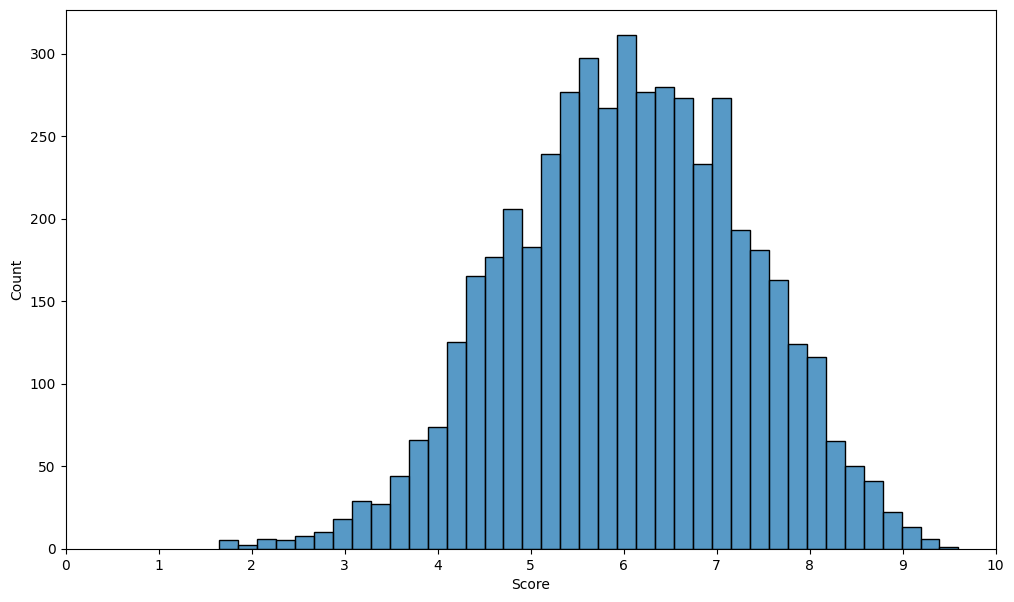

In [45]:
plt.figure(figsize=(12, 7))
sns.histplot(df_combined["Score"])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.show()

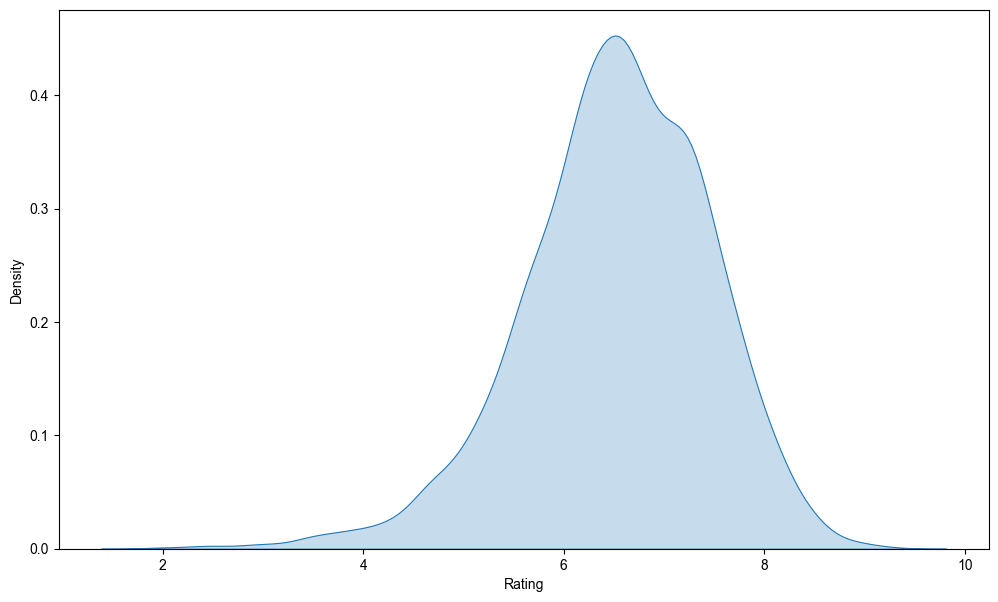

In [46]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.kdeplot(df_combined.Rating, fill = True)
plt.xlabel("Rating")
plt.ylabel("Density")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

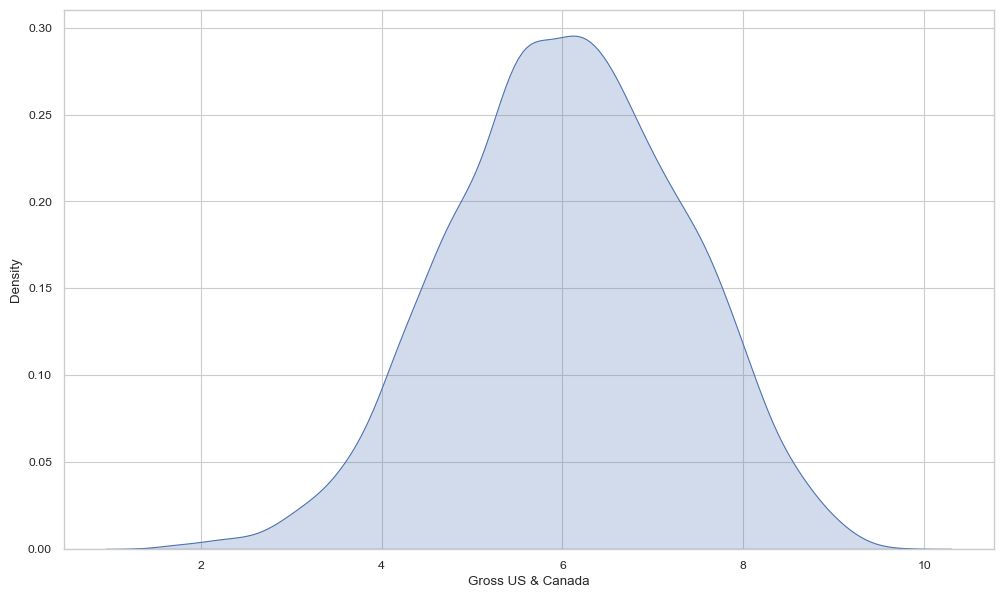

In [47]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.kdeplot(df_combined.Score, fill = True)
plt.xlabel("Gross US & Canada")
plt.ylabel("Density")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

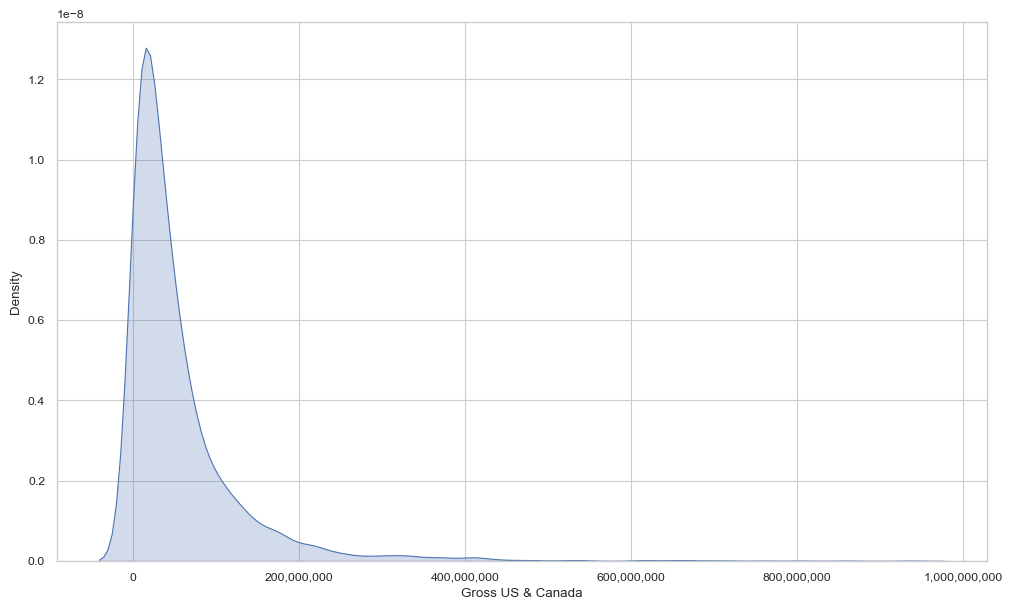

In [48]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.kdeplot(df_combined["Gross US & Canada"], fill = True)
plt.xlabel("Gross US & Canada")
plt.ylabel("Density")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

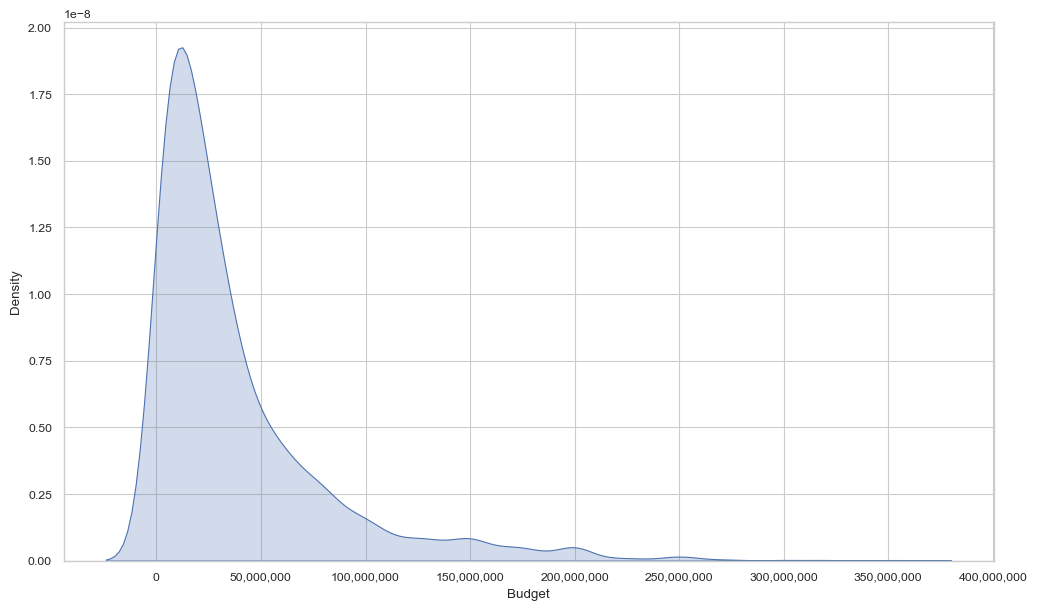

In [49]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.kdeplot(df_combined["Budget"], fill = True) 
plt.xlabel("Budget")
plt.ylabel("Density")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

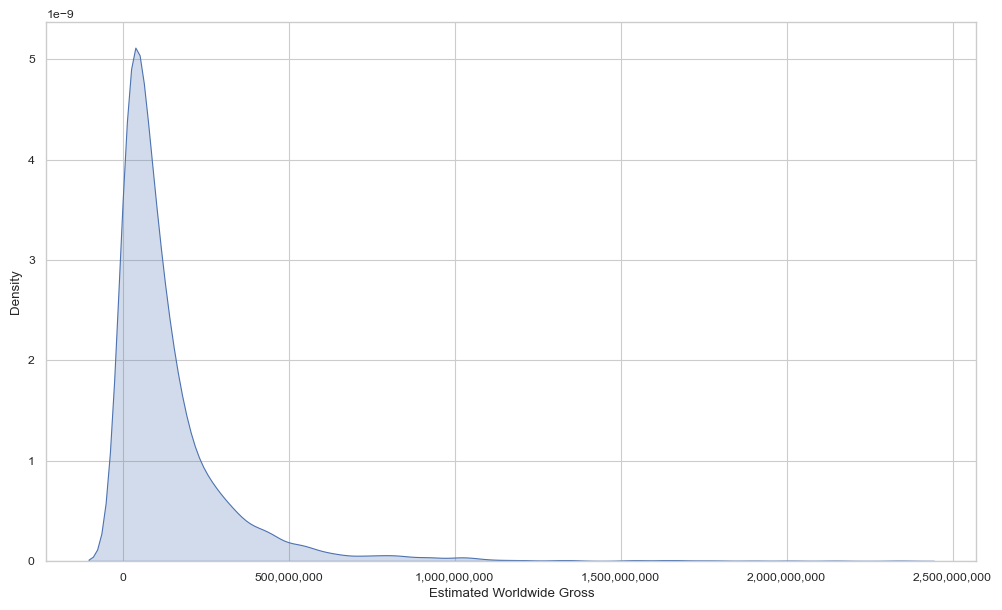

In [50]:
fig, ax = plt.subplots(figsize=(12, 7))


sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

sns.kdeplot(df_combined["Estimated Worldwide Gross"], fill = True) 
plt.xlabel("Estimated Worldwide Gross")
plt.ylabel("Density")

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

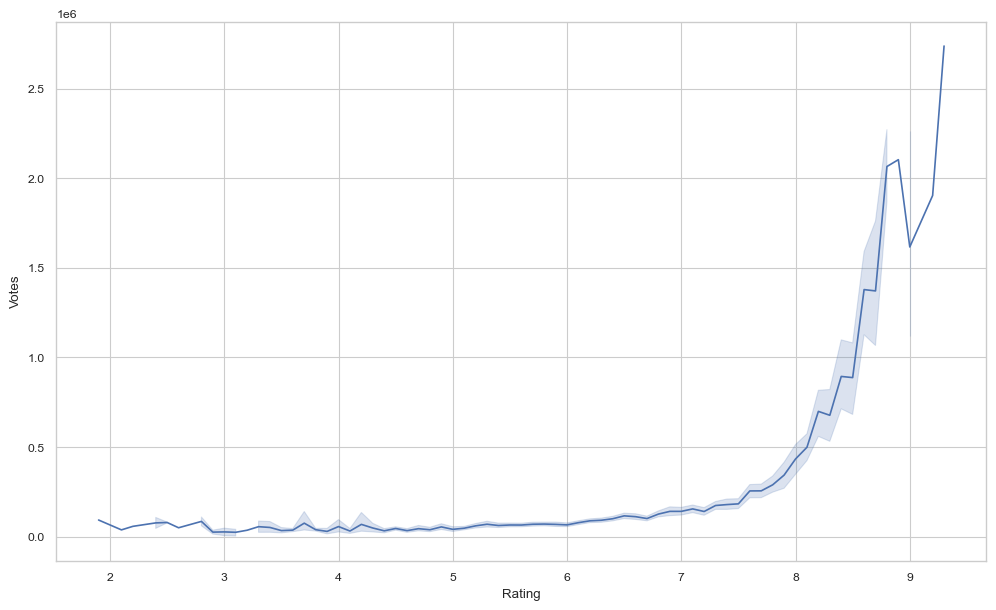

In [51]:
plt.figure(figsize=(12,7))

sns.lineplot(x="Rating", y="Votes", data=df_combined)

plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()

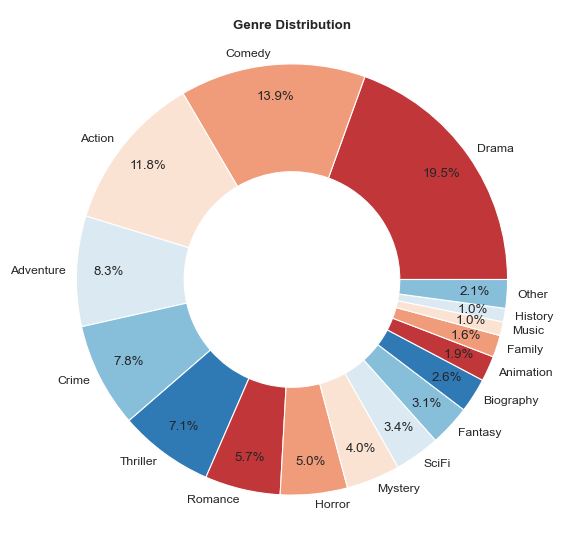

In [52]:
genre_counts = genres_dummies.sum()
total_count = genre_counts.sum()

genre_percentages = genre_counts / total_count * 100
genre_percentages_sorted = genre_percentages.sort_values(ascending=False)

threshold = 1
genre_percentages_sorted_other = genre_percentages_sorted.copy()
genre_percentages_sorted_other[genre_percentages_sorted_other < threshold] = 0
other_percentage = 100 - genre_percentages_sorted_other.sum()
genre_percentages_sorted_other = genre_percentages_sorted_other[genre_percentages_sorted_other >= threshold]
genre_percentages_sorted_other['Other'] = other_percentage

fig, ax = plt.subplots(figsize=(12,7))
sns.set_context("paper")
wedges, texts, autotexts = ax.pie(genre_percentages_sorted_other, colors=sns.color_palette("RdBu"), labels=genre_percentages_sorted_other.index, wedgeprops=dict(width=0.5), startangle=0, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.05)
plt.title("Genre Distribution", y= 0.95, weight="bold")
#plt.savefig("Genre Distribution.png", dpi = 300)
plt.show()

In [53]:
df_combined_without_string_column = df_combined.drop(["Title", "Genre", "Clear_Genre"], axis=1)
corr_matrix = df_combined_without_string_column.corr()

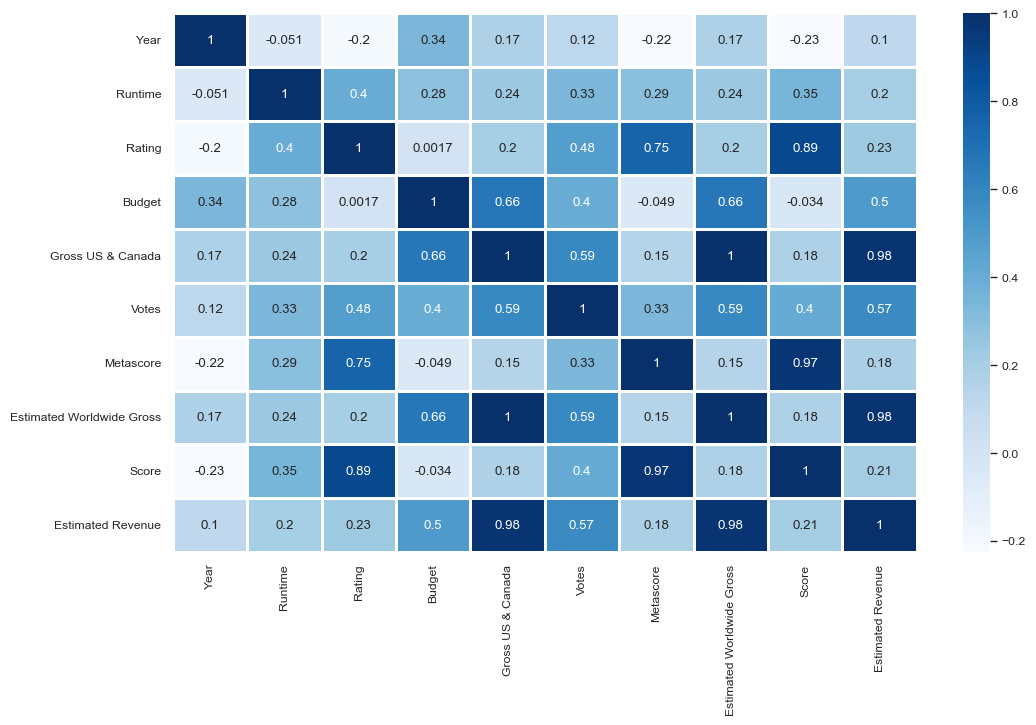

In [54]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, linewidths=1) 
plt.show()

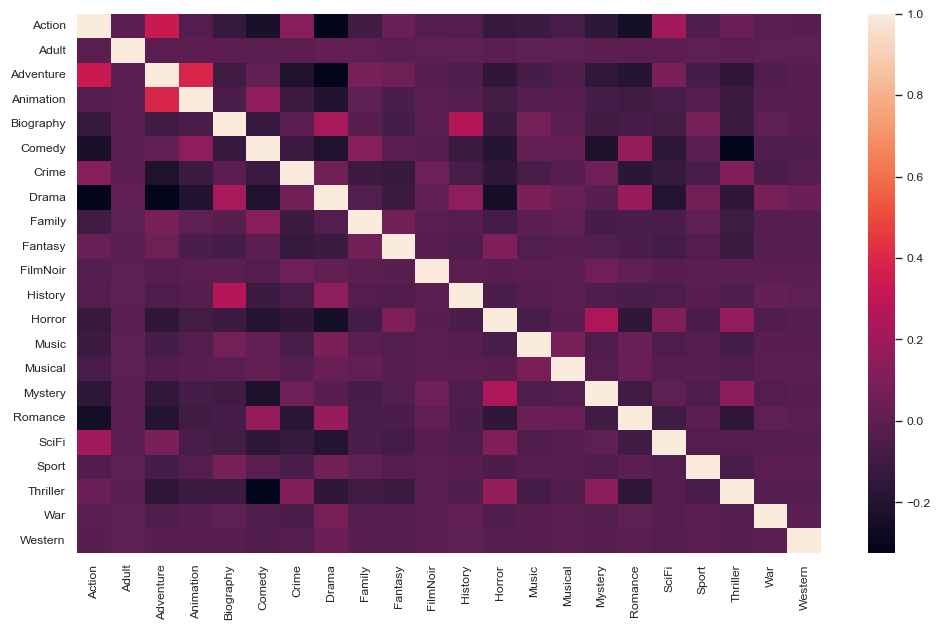

In [55]:
plt.figure(figsize=(12,7))
sns.heatmap(genres_dummies.corr(method='spearman'), annot=False)
plt.show()

---

In [56]:
genres_dummies.to_csv("imdb_scraped_data_all_clear_genre.csv", index = False)

In [57]:
df_combined.corr()

C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\3145903988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_combined.corr()


,Year,Runtime,Rating,Budget,Gross US & Canada,Votes,Metascore,Estimated Worldwide Gross,Score,Estimated Revenue
Year,1.000000,-0.051438,-0.204965,0.337608,0.169466,0.115824,-0.217645,0.169466,-0.226335,0.104269
Runtime,-0.051438,1.000000,0.398623,0.284187,0.241324,0.329391,0.291469,0.241324,0.348712,0.202238
Rating,-0.204965,0.398623,1.000000,0.001718,0.201961,0.475236,0.752068,0.201961,0.889278,0.233819
Budget,0.337608,0.284187,0.001718,1.000000,0.662814,0.396413,-0.049249,0.662814,-0.033545,0.495448
Gross US & Canada,0.169466,0.241324,0.201961,0.662814,1.000000,0.585652,0.146495,1.000000,0.175857,0.978812
Votes,0.115824,0.329391,0.475236,0.396413,0.585652,1.000000,0.329404,0.585652,0.403183,0.570992
Metascore,-0.217645,0.291469,0.752068,-0.049249,0.146495,0.329404,1.000000,0.146495,0.970241,0.183412
Estimated Worldwide Gross,0.169466,0.241324,0.201961,0.662814,1.000000,0.585652,0.146495,1.000000,0.175857,0.978812
Score,-0.226335,0.348712,0.889278,-0.033545,0.175857,0.403183,0.970241,0.175857,1.000000,0.213179
Estimated Revenue,0.104269,0.202238,0.233819,0.495448,0.978812,0.570992,0.183412,0.978812,0.213179,1.000000


In [58]:
# Assuming you have a DataFrame called df_combined
df_combined.rename(columns={'Gross US & Canada': 'Gross_US_Canada', 'Estimated Worldwide Gross': 'Estimated_Worldwide_Gross', 'Estimated Revenue': 'estimated_revenue'}, inplace=True)


In [59]:
df_combined.to_csv("imdb_scraped_data_all.csv", index = False)

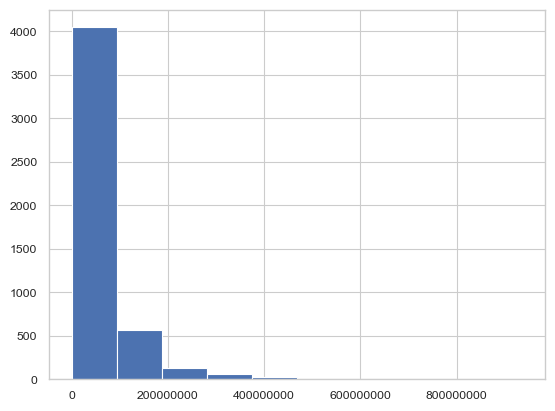

In [60]:
# Create the histogram
df_combined.Gross_US_Canada.hist()

# Get the current axes object
ax = plt.gca()

# Set the X-axis tick labels to display the values in decimal format
ax.get_xaxis().get_major_formatter().set_scientific(False)

# Show the plot
plt.show()


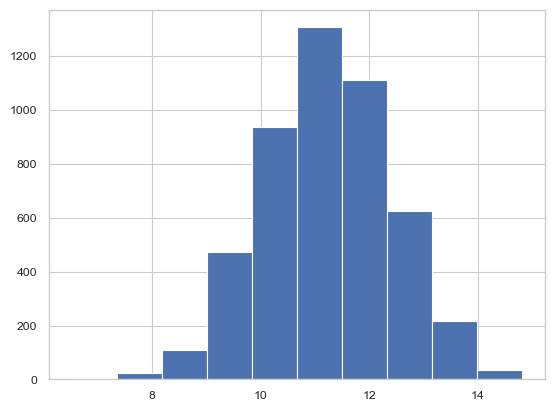

In [61]:
df_combined['log_votes'] = np.log(df_combined.Votes)

df_combined.log_votes.hist();

In [62]:
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Estimated_Worldwide_Gross,Score,estimated_revenue,log_votes
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama,1.337146e+09,8.70,1.152146e+09,14.812555
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi,7.314405e+08,8.10,5.714405e+08,14.693414
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,4.286998e+08,8.00,3.656998e+08,14.484640
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,7.888619e+08,9.00,6.958619e+08,14.463239
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.446148e+08,9.20,8.506148e+08,14.448050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller,2.082275e+06,5.45,-6.917725e+06,9.548026
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller,2.527635e+06,7.00,-7.472365e+06,9.530828
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery,8.102250e+04,4.65,-2.491898e+07,9.493336
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,5.595204e+08,8.95,3.795204e+08,13.946276


In [64]:
df_combined['Votes'].sort_values()

3631        677
3942       1087
4190       1265
4161       1315
3997       1343
         ...   
2972    2130297
3403    2179810
1       2405851
0       2710261
3541    2737594
Name: Votes, Length: 4852, dtype: int64

In [67]:
df_combined = df_combined[df_combined.Votes < 2200000]

In [74]:
df_combined['Votes'].sort_values()

3631        677
3942       1087
4190       1265
4161       1315
3997       1343
         ...   
3       1911195
2       1952536
2689    2103494
2972    2130297
3403    2179810
Name: Votes, Length: 4849, dtype: int64

<AxesSubplot: xlabel='Votes', ylabel='Count'>

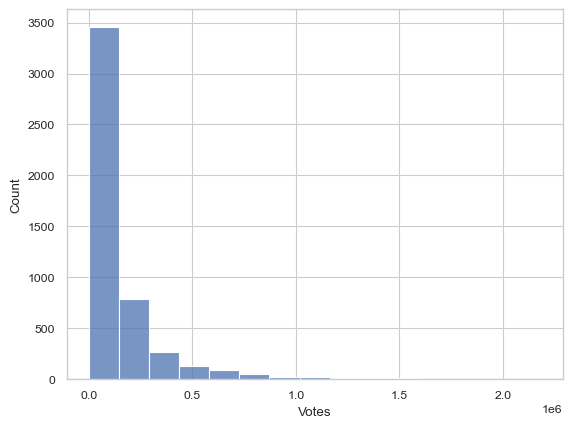

In [76]:
sns.histplot(df_combined.Votes, bins=15)

<AxesSubplot: xlabel='Votes', ylabel='Count'>

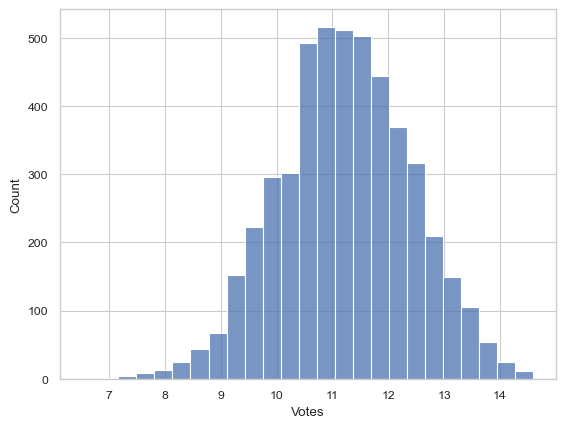

In [77]:
sns.histplot(np.log(df_combined.Votes), bins=25)

In [78]:
df_combined['VotesLog'] = np.log(df_combined.Votes)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Estimated_Worldwide_Gross,Score,estimated_revenue,VotesLog
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,4.286998e+08,8.00,365699825.0,14.484640
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,7.888619e+08,9.00,695861875.0,14.463239
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.446148e+08,9.20,850614762.5,14.448050
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,1.120348e+09,8.10,870347747.5,14.367793
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,8.563784e+08,8.75,762378412.5,14.345685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller,2.082275e+06,5.45,-6917725.0,9.548026
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller,2.527635e+06,7.00,-7472365.0,9.530828
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery,8.102250e+04,4.65,-24918977.5,9.493336
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,5.595204e+08,8.95,379520410.0,13.946276


<AxesSubplot: xlabel='Rating', ylabel='Count'>

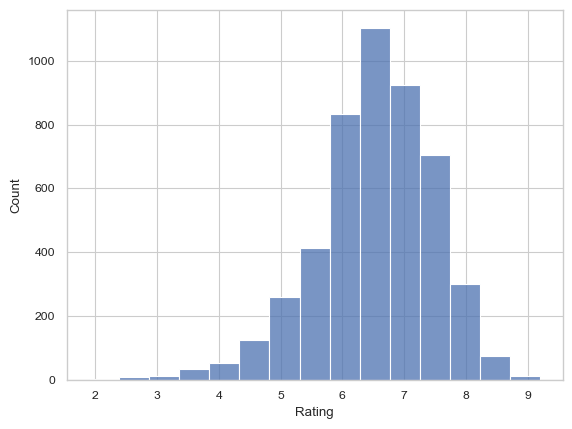

In [80]:
sns.histplot(df_combined.Rating, bins=15)

<AxesSubplot: xlabel='estimated_revenue', ylabel='Count'>

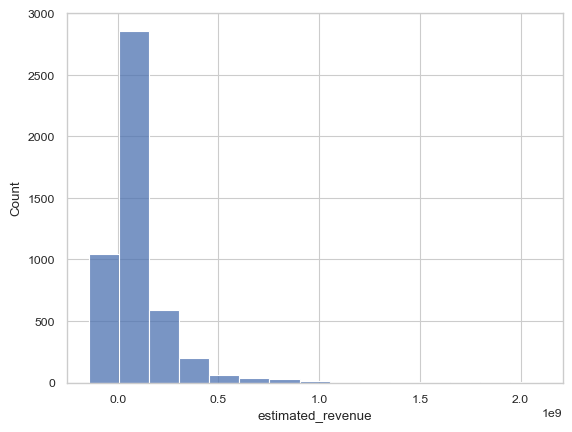

In [82]:
sns.histplot(df_combined.estimated_revenue, bins=15)

In [83]:
df_combined.estimated_revenue.sort_values()

2727   -1.415000e+08
562    -1.149328e+08
1324   -9.655171e+07
1070   -9.178023e+07
1299   -8.894980e+07
            ...     
102     1.626832e+09
11      1.664269e+09
14      1.789932e+09
43      1.811870e+09
26      2.096656e+09
Name: estimated_revenue, Length: 4849, dtype: float64

In [84]:
df_combined_test = df_combined[df_combined.estimated_revenue > 0]
df_combined_test

,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Estimated_Worldwide_Gross,Score,estimated_revenue,VotesLog
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,4.286998e+08,8.00,365699825.0,14.484640
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,7.888619e+08,9.00,695861875.0,14.463239
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.446148e+08,9.20,850614762.5,14.448050
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,1.120348e+09,8.10,870347747.5,14.367793
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,8.563784e+08,8.75,762378412.5,14.345685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,Meek's Cutoff,2010,104,Adventure - Drama - Thriller,6.5,2000000.0,977600.0,14559,85.0,Adventure Drama Thriller,2.444000e+06,7.50,444000.0,9.585965
4844,Deathtrap,1982,116,Comedy - Crime - Mystery,7.0,10000000.0,19282134.0,14387,54.0,Comedy Crime Mystery,4.820534e+07,6.20,38205335.0,9.574080
4846,Talk Radio,1988,110,Drama - Thriller,7.2,4000000.0,3468572.0,14113,66.0,Drama Thriller,8.671430e+06,6.90,4671430.0,9.554852
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,5.595204e+08,8.95,379520410.0,13.946276


In [85]:
df_combined_test.estimated_revenue.value_counts()

22750000.0     3
14500000.0     3
5650000.0      2
69000000.0     2
52000000.0     2
              ..
175427497.5    1
212175687.5    1
58194260.0     1
162616977.5    1
130387480.0    1
Name: estimated_revenue, Length: 4100, dtype: int64

<AxesSubplot: xlabel='estimated_revenue', ylabel='Count'>

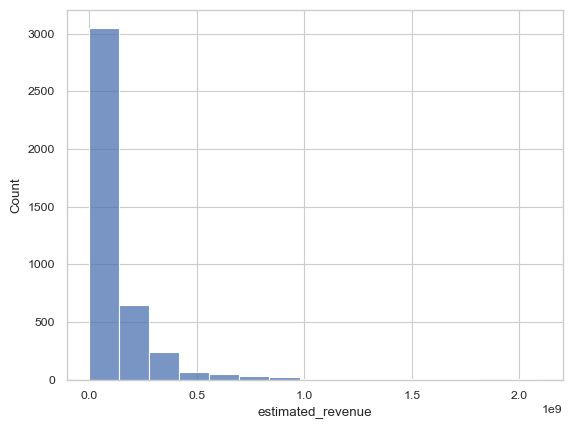

In [86]:
sns.histplot(df_combined_test.estimated_revenue, bins=15)

<AxesSubplot: xlabel='Estimated_Worldwide_Gross', ylabel='Count'>

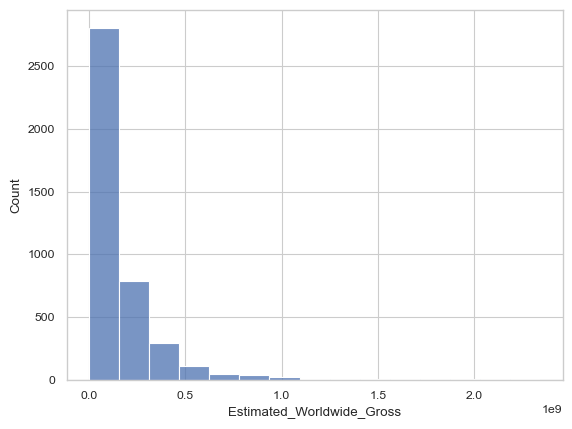

In [94]:
sns.histplot(df_combined_test.Estimated_Worldwide_Gross, bins=15)

In [92]:
df_combined_test.Estimated_Worldwide_Gross.sort_values()

2854    1.212050e+05
4702    1.721925e+05
4337    2.225725e+05
4426    2.494250e+05
4656    2.500000e+05
            ...     
102     1.796832e+09
11      1.901269e+09
43      2.011870e+09
14      2.145932e+09
26      2.341656e+09
Name: Estimated_Worldwide_Gross, Length: 4120, dtype: float64

<AxesSubplot: xlabel='Estimated_Worldwide_Gross', ylabel='Count'>

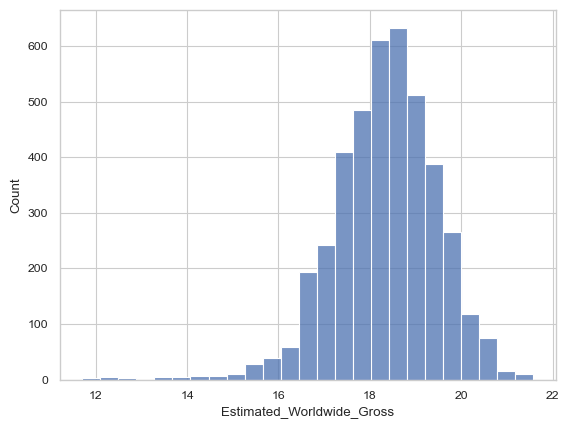

In [95]:
sns.histplot(np.log(df_combined_test.Estimated_Worldwide_Gross), bins=25)

<AxesSubplot: xlabel='estimated_revenue_log', ylabel='Count'>

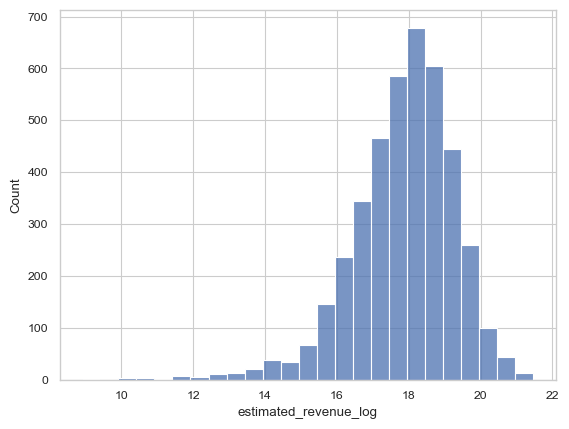

In [106]:
sns.histplot(np.log(df_combined_test.estimated_revenue_log), bins=25)

In [107]:
df_combined_test['estimated_revenue_log'] = np.log(df_combined_test.estimated_revenue)
df_combined_test

,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Score,estimated_revenue,VotesLog,Estimated_Worldwide_GrossLog,estimated_revenue_log
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,8.00,19.717323,14.484640,2.989526,2.981498
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,9.00,20.360662,14.463239,3.019747,3.013605
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.20,20.561470,14.448050,3.028504,3.023419
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,8.10,20.584403,14.367793,3.036726,3.024534
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,8.75,20.451954,14.345685,3.023747,3.018078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,Meek's Cutoff,2010,104,Adventure - Drama - Thriller,6.5,2000000.0,977600.0,14559,85.0,Adventure Drama Thriller,7.50,13.003580,9.585965,2.688470,2.565225
4844,Deathtrap,1982,116,Comedy - Crime - Mystery,7.0,10000000.0,19282134.0,14387,54.0,Comedy Crime Mystery,6.20,17.458486,9.574080,2.873055,2.859826
4846,Talk Radio,1988,110,Drama - Thriller,7.2,4000000.0,3468572.0,14113,66.0,Drama Thriller,6.90,15.356976,9.554852,2.771059,2.731570
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,8.95,19.754419,13.946276,3.002837,2.983377


In [97]:
df_combined_test['Estimated_Worldwide_GrossLog'] = np.log(df_combined_test.Estimated_Worldwide_Gross)
df_combined_test

C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\2585610802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_test['Estimated_Worldwide_GrossLog'] = np.log(df_combined_test.Estimated_Worldwide_Gross)


,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Estimated_Worldwide_Gross,Score,estimated_revenue,VotesLog,Estimated_Worldwide_GrossLog
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,19.876268,8.00,19.717323,14.484640,2.989526
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,20.486102,9.00,20.360662,14.463239,3.019747
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,20.666288,9.20,20.561470,14.448050,3.028504
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,20.836905,8.10,20.584403,14.367793,3.036726
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,20.568223,8.75,20.451954,14.345685,3.023747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,Meek's Cutoff,2010,104,Adventure - Drama - Thriller,6.5,2000000.0,977600.0,14559,85.0,Adventure Drama Thriller,14.709147,7.50,13.003580,9.585965,2.688470
4844,Deathtrap,1982,116,Comedy - Crime - Mystery,7.0,10000000.0,19282134.0,14387,54.0,Comedy Crime Mystery,17.690980,6.20,17.458486,9.574080,2.873055
4846,Talk Radio,1988,110,Drama - Thriller,7.2,4000000.0,3468572.0,14113,66.0,Drama Thriller,15.975544,6.90,15.356976,9.554852,2.771059
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,20.142591,8.95,19.754419,13.946276,3.002837


In [99]:
df_combined_test = df_combined_test.drop('Estimated_Worldwide_Gross', axis=1)
df_combined_test

,Title,Year,Runtime,Genre,Rating,Budget,Gross_US_Canada,Votes,Metascore,Clear_Genre,Score,estimated_revenue,VotesLog,Estimated_Worldwide_GrossLog
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,8.00,19.717323,14.484640,2.989526
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,9.00,20.360662,14.463239,3.019747
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,9.20,20.561470,14.448050,3.028504
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,8.10,20.584403,14.367793,3.036726
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,8.75,20.451954,14.345685,3.023747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,Meek's Cutoff,2010,104,Adventure - Drama - Thriller,6.5,2000000.0,977600.0,14559,85.0,Adventure Drama Thriller,7.50,13.003580,9.585965,2.688470
4844,Deathtrap,1982,116,Comedy - Crime - Mystery,7.0,10000000.0,19282134.0,14387,54.0,Comedy Crime Mystery,6.20,17.458486,9.574080,2.873055
4846,Talk Radio,1988,110,Drama - Thriller,7.2,4000000.0,3468572.0,14113,66.0,Drama Thriller,6.90,15.356976,9.554852,2.771059
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,8.95,19.754419,13.946276,3.002837


C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\511466302.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined_test.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);
C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\511466302.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined_test.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);


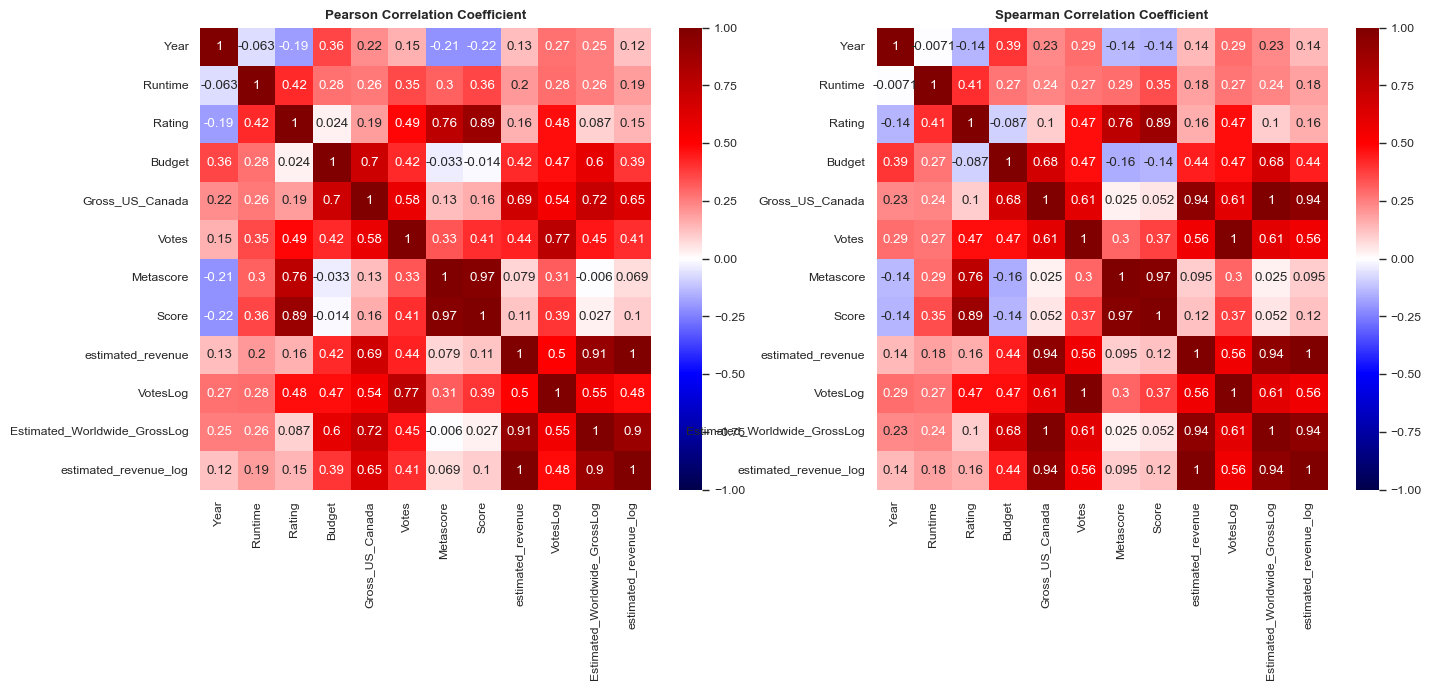

In [109]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(df_combined_test.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(df_combined_test.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\3954428333.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);
C:\Users\huawei\AppData\Local\Temp\ipykernel_19136\3954428333.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);


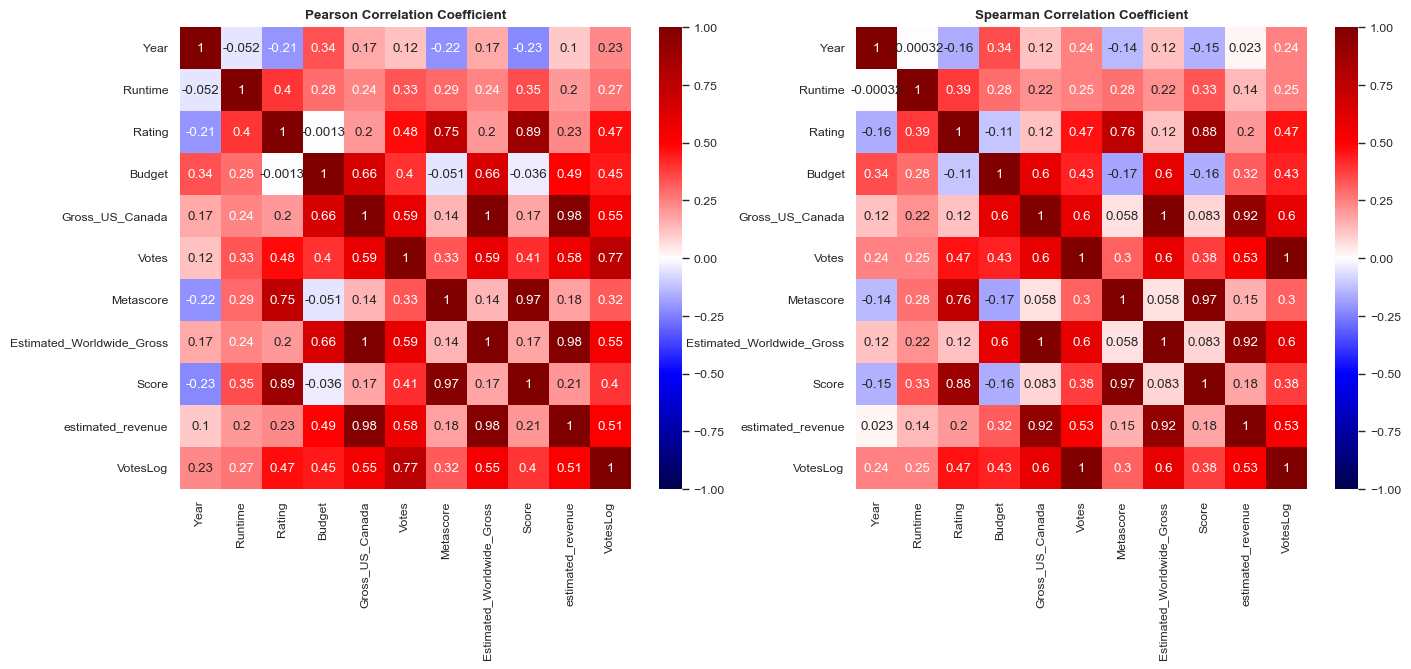

In [79]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(df_combined.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(df_combined.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [108]:
df_combined_test.to_csv("imdb_scraped_data_all_test.csv", index = False)